In [5]:
from qrexp import generator as qrgen

qrgen.generate_random("data/qrdata/train/", 1000)

2632 created
1975 created
5174 created
6568 created
2550 created
4700 created
8612 created
1295 created
7378 created
8182 created
8117 created
4346 created
3092 created
5765 created
3299 created
2952 created
7453 created
6061 created
2590 created
1932 created
7147 created
9236 created
6883 created
1279 created
1608 created
1683 created
1775 created
4763 created
2545 created
4188 created
2556 created
7486 created
4911 created
7835 created
9610 created
6941 created
2197 created
2235 created
2594 created
1844 created
4970 created
9686 created
7953 created
1040 created
6703 created
8909 created
8636 created
3068 created
1560 created
5200 created
9415 created
7160 created
5403 created
4827 created
3101 created
3687 created
4928 created
5415 created
1664 created
1601 created
4663 created
4788 created
7079 created
6399 created
2341 created
7473 created
4547 created
7542 created
4936 created
7580 created
2833 created
5048 created
9395 created
3498 created
9100 created
1285 created
1280 created

2770 created
7860 created
5212 created
6842 created
3140 created
8457 created
8424 created
4927 created
3042 created
2576 created
4937 created
7611 created
8006 created
8474 created
2797 created
3893 created
6034 created
7732 created
3444 created
2028 created
9386 created
7823 created
4094 created
6535 created
5286 created
7720 created
7568 created
2654 created
3074 created
3545 created
4089 created
3176 created
2292 created
1443 created
3491 created
7758 created
5748 created
9258 created
3259 created
4457 created
3764 created
7850 created
2040 created
4379 created
9791 created
6068 created
4691 created
3823 created
4406 created
6788 created
8127 created
1637 created
2252 created
1935 created
1185 created
3692 created
7995 created
4881 created
2317 created
1947 created
3848 created
3619 created
3350 created
3451 created
4125 created
3577 created
2749 created
2222 created
2778 created
9359 created
9794 created
8937 created
6943 created
8010 created
2835 created
2867 created
1016 created

In [6]:
import imgloader as il

In [7]:
X, y= il.load_dataset("data/qrdata/train/", -1, size= (50, 50))

Total 1000 image files found
Resizing DONE
Converting to NP DONE


In [8]:
print(X.shape)
print(y.shape)

(1000, 50, 50, 3)
(1000, 1)


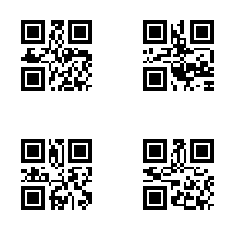

In [9]:
il.plot_np_imgs(X)

In [10]:
y[:4]

array([[1016],
       [1022],
       [1034],
       [1040]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, Model

In [22]:
img_input= layers.Input(shape= (50, 50, 3))

In [23]:
x= layers.Conv2D(16, 3, activation='relu')(img_input)
x= layers.MaxPool2D(2)(x)

In [24]:
x= layers.Conv2D(32, 3, activation='relu')(x)
x= layers.MaxPool2D(2)(x)

In [25]:
x= layers.Flatten()(x)

In [26]:
x= layers.Dense(512, activation='relu')(x)
x= layers.Dropout(0.2)(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
x= layers.Dense(64, activation='relu')(x)
x= layers.Dropout(0.2)(x)

In [28]:
output= layers.Dense(1)(x)

In [29]:
model= Model(img_input, output)

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1982976   
__________

In [31]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='mean_squared_error',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc', 'mean_squared_error'])

Instructions for updating:
Use tf.cast instead.


In [33]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 750 samples, validate on 250 samples
Epoch 1/50
750/750 [==============================] - 3s 4ms/sample - loss: 9105819.7093 - acc: 0.0000e+00 - mean_squared_error: 9105818.0000 - val_loss: 8998998.0000 - val_acc: 0.0000e+00 - val_mean_squared_error: 8998998.0000
Epoch 2/50
750/750 [==============================] - 3s 4ms/sample - loss: 8464305.9840 - acc: 0.0000e+00 - mean_squared_error: 8464306.0000 - val_loss: 6901571.8840 - val_acc: 0.0000e+00 - val_mean_squared_error: 6901571.5000
Epoch 3/50
750/750 [==============================] - 3s 4ms/sample - loss: 8682182.9587 - acc: 0.0000e+00 - mean_squared_error: 8682183.0000 - val_loss: 8535333.7840 - val_acc: 0.0000e+00 - val_mean_squared_error: 8535334.0000
Epoch 4/50
750/750 [==============================] - 3s 4ms/sample - loss: 7652761.1280 - acc: 0.0000e+00 - mean_squared_error: 7652762.5000 - val_loss: 7613859.7120 - val_acc: 0.0000e+00 - val_mean_squared_error: 7613860.0000
Epoch 5/50
750/750 [======================

Epoch 37/50
750/750 [==============================] - 3s 5ms/sample - loss: 979111.5913 - acc: 0.0000e+00 - mean_squared_error: 979111.6250 - val_loss: 1336752.0670 - val_acc: 0.0000e+00 - val_mean_squared_error: 1336752.1250
Epoch 38/50
750/750 [==============================] - 3s 5ms/sample - loss: 861650.6993 - acc: 0.0000e+00 - mean_squared_error: 861650.6875 - val_loss: 1462860.8050 - val_acc: 0.0000e+00 - val_mean_squared_error: 1462860.6250
Epoch 39/50
750/750 [==============================] - 4s 5ms/sample - loss: 889974.7911 - acc: 0.0000e+00 - mean_squared_error: 889974.8125 - val_loss: 732324.3385 - val_acc: 0.0000e+00 - val_mean_squared_error: 732324.3750
Epoch 40/50
750/750 [==============================] - 4s 5ms/sample - loss: 901393.5220 - acc: 0.0000e+00 - mean_squared_error: 901393.4375 - val_loss: 920703.7600 - val_acc: 0.0000e+00 - val_mean_squared_error: 920703.8125
Epoch 41/50
750/750 [==============================] - 3s 4ms/sample - loss: 911507.4063 - acc: 